# Results of evalutation

evaluated tools:
- FastSurfer
- SynthSeg:
    - normal
    - robust
    - fast

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
freesurfer_df = pd.read_csv("../results/freesurfer_results.csv")
fastsurfer_df = pd.read_csv("../results/fastsurfer_results.csv")
ss_df = pd.read_csv("../results/synthseg_ss_results.csv")
rob_df = pd.read_csv("../results/synthseg_rob_results.csv")
fast_df = pd.read_csv("../results/synthseg_fast_results.csv")

Tissue classes:


2:  Left White Matter

3:  Left Gray Matter

41: Right White Matter

42: Right Gray Matter


In array order:
[left white matter, left gray matter, right white matter, right gray matter]

In [28]:
ss_df

,Name,Dice,AverageSurfaceDistance,Hausdorff
0,210525,0.913872,"[(0.5877035420615638, 1.1402246996147152), (0....","[6.48074069840786, 2.23606797749979, 6.7082039..."
1,l4879,0.922491,"[(0.6347683396455093, 1.2354566478891469), (0....","[8.0, 2.0, 7.0, 2.0]"
2,l7349,0.915411,"[(0.6365112811836702, 1.1768981523539406), (0....","[7.0, 2.0, 7.0710678118654755, 2.0]"
3,fb9364,0.905508,"[(0.4780304149098425, 1.0008202182868897), (0....","[6.0, 2.449489742783178, 5.385164807134504, 3.0]"
4,fb9455,0.913120,"[(0.5643623369428963, 0.9468893189676084), (0....","[5.385164807134504, 2.23606797749979, 5.196152..."
5,jb1922,0.913149,"[(0.5782481772003217, 1.0238965467621537), (0....","[5.744562646538029, 2.23606797749979, 5.656854..."
6,me0801,0.900070,"[(0.5316185889706211, 0.9798079227378876), (0....","[5.385164807134504, 2.23606797749979, 5.099019..."
7,me1102,0.896892,"[(0.5817322855176088, 1.1015077198189542), (0....","[7.0, 2.23606797749979, 7.0, 2.23606797749979]"
8,vk1506,0.915544,"[(0.5079247051065016, 0.991700513839508), (0.7...","[6.082762530298219, 2.449489742783178, 4.89897..."
9,vk3464,0.915120,"[(0.5121052002098614, 0.9746607024978791), (0....","[5.0990195135927845, 2.23606797749979, 5.09901..."


In [11]:
fastsurfer_dice_mean = fastsurfer_df.Dice.values.mean()
ss_dice_mean = ss_df.Dice.values.mean()
rob_dice_mean = rob_df.Dice.values.mean()
fast_dice_mean = fast_df.Dice.values.mean()

In [18]:
print(f"Fastsurfer dice mean: {fastsurfer_dice_mean}\nSynthseg dice mean: {ss_dice_mean}\nSynthseg robust dice mean: {rob_dice_mean}\nSynthseg fast dice mean:{fast_dice_mean}")

Fastsurfer dice mean: 0.5676551021601006
Synthseg dice mean: 0.91111780286237
Synthseg robust dice mean: 0.9054463126791827
Synthseg fast dice mean:0.907379762183148


In [20]:
fastsurfer_df.Hausdorff[0]

'[17.029386365926403, 15.905973720586866, 21.354156504062622, 21.79449471770337]'

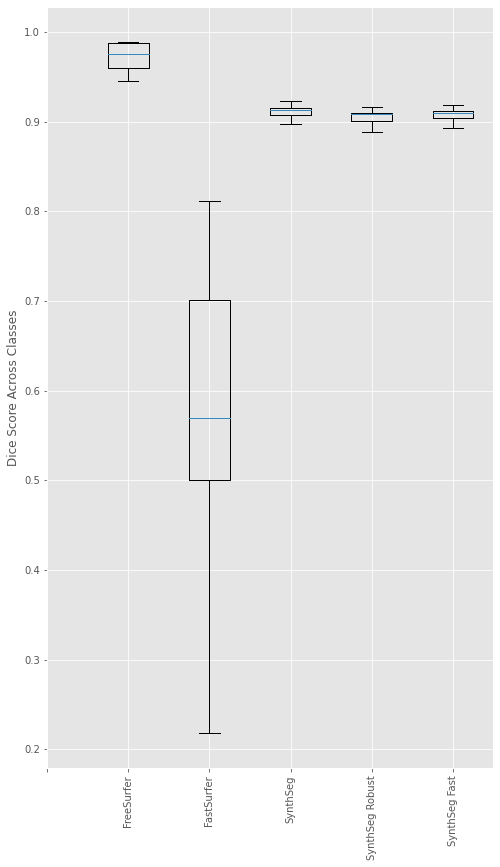

In [47]:
boxes = [freesurfer_df.Dice.values, fastsurfer_df.Dice.values, ss_df.Dice.values, rob_df.Dice.values, fast_df.Dice.values]
xs = list(range(6))
plt.style.use("ggplot")
plt.figure(figsize=(8,14))
plt.boxplot(boxes)
plt.xticks(ticks=xs, labels=["", "FreeSurfer", "FastSurfer", "SynthSeg", "SynthSeg Robust", "SynthSeg Fast"], rotation="vertical")
plt.ylabel("Dice Score Across Classes")
plt.savefig("./boxplot_dice.png")
plt.show()


In [51]:
freesurfer_df.Dice.values.mean()

0.9726590758612765

In [55]:
def create_df_with_all_values(df):
    names, dice, asd_lwm, asd_lgm, asd_rwm, asd_rgm, hd_lwm, hd_lgm, hd_rwm, hd_rgm = [], [], [], [], [], [], [], [], [], []
    for i, r in df.iterrows():
        names.append(r.Name)
    res_dic = {"Name": names}
    return names